# Testing out time series anomoly detection algorithms and methods

Start by using the DC hate crime dataset from 2012-2020 since it has already been cleaned.

In [65]:
# imports
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import plotly.express as px


Look at techniques from [sourceA](https://neptune.ai/blog/anomaly-detection-in-time-series), [source1](https://www.kaggle.com/code/adithya44/anomaly-detection-with-time-series-forecasting) 

In [66]:
df = pd.read_csv('data/hatecrime_df_clean.csv')
df.head()

,Date of Offense,Time of Offense,Date Offense Reported,Report Year,Month,CCN,District,Block Location,Type of Hate Bias,Targeted Group,Top Offense Type,Address,gcode,lat,long,zipcodes
0,2012-01-08,1500-1505,2012-01-08,2012,1,12003845,3,1600 B/O 17th St NW,Sexual Orientation,Not Reported,Threats,1600 17th St NW Washington DC,"1600, 17th Street Northwest, Dupont Circle, Wa...",38.911250,-77.038588,20009
1,2012-01-14,0240-0250,2012-01-14,2012,1,12006716,3,1800 B/O 14th St NW,Sexual Orientation,Not Reported,Simple Assault,1800 14th St NW Washington DC,"1800, 14th Street Northwest, Cardozo/Shaw, Was...",38.914217,-77.032054,20009
2,2012-01-22,145,2012-01-22,2012,1,12010626,7,1300 B/O Alabama Ave SE,Sexual Orientation,Not Reported,ADW,1300 Alabama Ave SE Washington DC,"1300, Alabama Avenue Southeast, Washington, Di...",38.845056,-76.987412,20020
3,2012-01-22,1930,2012-01-22,2012,1,12010912,1,600 B/O H St NW,Race,Asian,Threats,600 H St NW Washington DC,"600, H Street Northwest, Chinatown, Washington...",38.899729,-77.020065,20001
4,2012-02-06,1900,2012-02-06,2012,2,12018396,3,1300 B/O Park Rd NW,Sexual Orientation,Not Reported,Simple Assault,1300 Park Rd NW Washington DC,"1300, Park Road Northwest, Columbia Heights, W...",38.931198,-77.029808,20010


Prepare the dataframes to store one row per time interval we want to explore - in this case day, month, and year.

In [74]:
# prep a dataframe to have one row per date with the count of crimes
df_daily_counts = df['Date of Offense'].value_counts()
df_daily_counts = pd.Series(df_daily_counts).reset_index(name='Hate crime count').rename(columns={'index':'Date of Offense'})

# add new columns for year, month, and year/month combination
df_daily_counts['Year'] = pd.to_datetime(df_daily_counts['Date of Offense']).dt.year
df_daily_counts['Month'] = pd.to_datetime(df_daily_counts['Date of Offense']).dt.month
df_daily_counts['MonthYear'] = pd.to_datetime(df_daily_counts['Date of Offense']).dt.to_period('M')

# set the date as a datetime and reset index.
df_daily_counts['Date of Offense'] = df_daily_counts['Date of Offense'].astype('datetime64[ns]')
df_daily_counts = df_daily_counts.set_index('Date of Offense') # reset the index

# df just for month and year trending - drop unneeded columns and set the index to be the timeframe
df_yearly_counts = df_daily_counts.groupby('Year').sum().reset_index().drop(columns=['Month']).set_index('Year')
df_monthly_counts = df_daily_counts.groupby('MonthYear').sum().reset_index().drop(columns=['Month','Year']).set_index('MonthYear')

### View the monthly trending data.

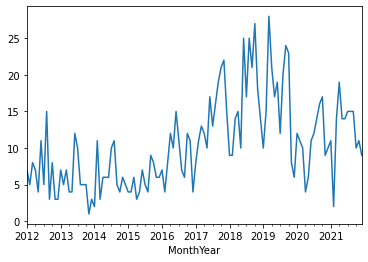

In [68]:
df_monthly_counts['Hate crime count'].plot(kind='line');


In [76]:
# plotly
fig = px.line(df_monthly_counts, x=df_monthly_counts.index.to_timestamp(), y='Hate crime count', title='Hate crime counts in DC 2012-2021')
fig.update_layout(xaxis_title='Month')
fig.show()

In [75]:
df_daily_counts.loc['2021-01']

,Hate crime count,Year,Month,MonthYear
Date of Offense,,,,
2021-01-26,2,2021,1,2021-01
2021-01-06,1,2021,1,2021-01
2021-01-07,1,2021,1,2021-01
2021-01-09,1,2021,1,2021-01
2021-01-14,1,2021,1,2021-01
2021-01-15,1,2021,1,2021-01
2021-01-16,1,2021,1,2021-01
2021-01-19,1,2021,1,2021-01
2021-01-20,1,2021,1,2021-01


In [82]:
df_monthly_counts

,Hate crime count
MonthYear,
2012-01,7
2012-02,5
2012-03,8
2012-04,7
2012-05,4
...,...
2021-08,15
2021-09,15
2021-10,10


### Stationarity

In [81]:
from statsmodels.tsa.stattools import adfuller

In [83]:
result = adfuller(df_monthly_counts['Hate crime count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.261919
p-value: 0.646409
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


#### Reading
https://www.machinelearningplus.com/time-series/time-series-analysis-python/
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

**Potential code help**

https://www.kaggle.com/code/adithya44/anomaly-detection-with-time-series-forecasting
https://www.projectpro.io/article/how-to-build-arima-model-in-python/544


iot
https://www.kaggle.com/code/koheimuramatsu/iot-temperature-forecasting



https://towardsdatascience.com/real-time-time-series-anomaly-detection-981cf1e1ca13